## Bloby's performance after limiting volume of connected components

After erosion, Bloby uses connected components to detect synapses. Here, we restrict the volume of connected components and study size effects on Bloby's performance.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from bloby import util

threshold_size = []
precision = []
recall = []
f1 = []
for i in np.arange(0,30,1):
    input_tif_path = 'sample.tif' 
    #output_csv_path = 'sample_out.csv'
    detector = BlobDetector(input_tif_path, n_components = 3) ##here the intensity threshold assumed to be 5000
    centroids = detector.get_blob_centroids(size_filter=i)
    #util.write_list_to_csv(centroids, output_csv_path)

    ground_truth_path = 'sample.csv'
    ground_truth = util.get_list_from_csv(ground_truth_path)
    metrics = BlobMetrics(ground_truth, centroids)
    print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))

    #metrics.plot_predictions_per_ground_truth()
    #metrics.plot_ground_truths_per_prediction()
    f1_calc = (2*metrics.precision()*metrics.recall())/(metrics.precision() + metrics.recall())
    
    threshold_size.append(i)
    precision.append(metrics.precision())
    recall.append(metrics.recall())
    f1.append(f1_calc)
    


/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/tifffile/tifffile.py:7685: UserWarning: No module named 'tifffile._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


Precision: 0.094
Recall: 0.984
Precision: 0.183
Recall: 0.955
Precision: 0.259
Recall: 0.887
Precision: 0.334
Recall: 0.855
Precision: 0.386
Recall: 0.805
Precision: 0.436
Recall: 0.771
Precision: 0.478
Recall: 0.726
Precision: 0.514
Recall: 0.7
Precision: 0.548
Recall: 0.663
Precision: 0.575
Recall: 0.629
Precision: 0.593
Recall: 0.603
Precision: 0.605
Recall: 0.576
Precision: 0.63
Recall: 0.547
Precision: 0.657
Recall: 0.534
Precision: 0.684
Recall: 0.518
Precision: 0.681
Recall: 0.5
Precision: 0.696
Recall: 0.482
Precision: 0.698
Recall: 0.463
Precision: 0.713
Recall: 0.45
Precision: 0.723
Recall: 0.439
Precision: 0.742
Recall: 0.432
Precision: 0.746
Recall: 0.418
Precision: 0.739
Recall: 0.403
Precision: 0.756
Recall: 0.392
Precision: 0.763
Recall: 0.382
Precision: 0.769
Recall: 0.368
Precision: 0.78
Recall: 0.363
Precision: 0.798
Recall: 0.353
Precision: 0.806
Recall: 0.35
Precision: 0.811
Recall: 0.339


In [3]:
print(threshold_size)
print(f1)
print(recall)
print(precision)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0.17160667903525045, 0.30714411247803164, 0.40093019197207685, 0.48035323801513874, 0.5217968094038623, 0.5570107705053853, 0.5764584717607973, 0.5927512355848435, 0.6000396366639141, 0.6007890365448505, 0.5979581939799331, 0.5901439458086366, 0.5855734919286322, 0.5891486146095718, 0.5895374376039934, 0.5766299745977985, 0.5695619694397284, 0.5567166236003446, 0.5517626827171108, 0.5462943201376936, 0.5460715502555367, 0.535786941580756, 0.5215709281961471, 0.5162926829268292, 0.5091109170305677, 0.49778715919085315, 0.49543307086614174, 0.4894769765421373, 0.4880622837370242, 0.47813739130434785]
[0.984, 0.955, 0.887, 0.855, 0.805, 0.771, 0.726, 0.7, 0.663, 0.629, 0.603, 0.576, 0.547, 0.534, 0.518, 0.5, 0.482, 0.463, 0.45, 0.439, 0.432, 0.418, 0.403, 0.392, 0.382, 0.368, 0.363, 0.353, 0.35, 0.339]
[0.094, 0.183, 0.259, 0.334, 0.386, 0.436, 0.478, 0.514, 0.548, 0.575, 0.593,

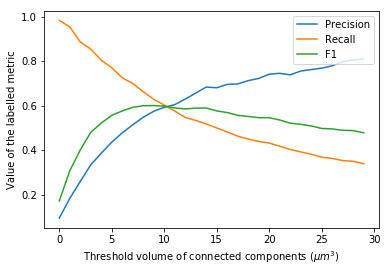

In [4]:
## Plots of F1 meaaures and size threshold values:

plt.plot(threshold_size, precision)
plt.plot(threshold_size, recall)
plt.plot(threshold_size, f1)
plt.xlabel('Threshold volume of connected components (${\mu}m^3$)')
plt.ylabel('Value of the labelled metric')

plt.legend(['Precision', 'Recall', 'F1'], loc='upper right')

plt.show()

### Generate overlays for 9 ${\mu}m^3$ size threshold
Size 9 gives highest F1

Precision: 0.575
Recall: 0.629


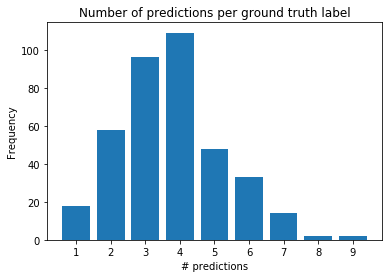

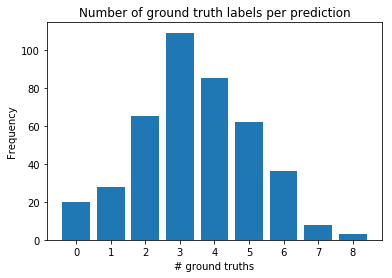

In [5]:
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from bloby import util

input_tif_path = 'sample.tif' 
output_csv_path = 'sample_out_size.csv'
detector = BlobDetector(input_tif_path, n_components = 3, threshold = 5000)
centroids = detector.get_blob_centroids(size_filter = 9)
util.write_list_to_csv(centroids, output_csv_path)

ground_truth_path = 'sample.csv'
ground_truth = util.get_list_from_csv(ground_truth_path)
metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))

metrics.plot_predictions_per_ground_truth()
metrics.plot_ground_truths_per_prediction()

In [17]:
def overlay_code(image,gt_ellipses, pred_ellipses, numb):
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title('Z-slice =' + str(numb) + ': Overlays for size threshold 9 ${\mu}m^3$', fontweight = 'bold')
    ax.imshow(image, cmap = mpl.cm.gray)
    plt.autoscale(False)


    for idx, row in gt_ellipses.iterrows():
        x = row['X']
        y = row['Y'] 
        elps_1 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'g', lw = 2, facecolor = 'none')
        ax.add_patch(elps_1)


    for idx, row in pred_ellipses.iterrows():
        x = row['X'] 
        y = row['Y'] 
        elps_2 = mpl.patches.Ellipse((x, y), width = 6, height = 10, edgecolor = 'r', lw = 2, facecolor = 'none')
        ax.add_patch(elps_2)

    red_patch = mpl.patches.Patch(color = 'red', label = 'Prediction, Z-slice =' + str(numb))
    green_patch = mpl.patches.Patch(color = 'green', label = 'Ground Truth, Z-slice =' + str(numb))
    plt.legend(handles = [red_patch, green_patch], bbox_to_anchor = (0, 0), loc = "upper left")

    scalebar = ScaleBar(0.09, 'um', length_fraction = 0.1, height_fraction = 0.005, color = 'k', border_pad = 0.5)
    ax.add_artist(scalebar)
    ax.axis('off')

    plt.show()

### Open tif file 

In [18]:
from scipy.ndimage import imread

In [19]:
from skimage.color import rgb2gray
import matplotlib as mpl
import matplotlib.pyplot as plt





from matplotlib_scalebar.scalebar import ScaleBar

In [20]:
im1 = imread('slice_8.png')
im2 = imread('slice_15.png')
im3 = imread('slice_10.png')

im1_final = rgb2gray(im1)
im2_final = rgb2gray(im2)
im3_final = rgb2gray(im3)

/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Import csv file as pandas dataframe 

In [21]:
g_tru = pd.read_csv('ground_truth.csv')

pred = pd.read_csv('sample_out_size.csv')

### From pandas dataframe, extract only z-slice of a certain value

In [22]:
gt_8_ellipse = g_tru[g_tru['Z'] == 7]


pred_8_ellipse = pred[pred['Z'] == 7]




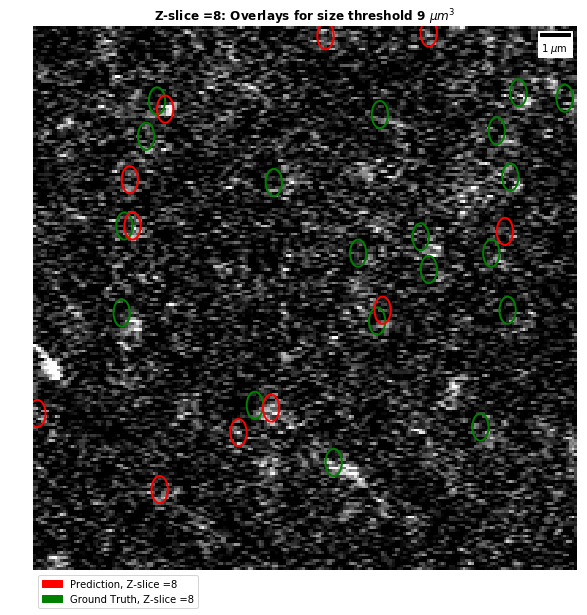

In [23]:
overlay_code(im1_final,gt_8_ellipse,pred_8_ellipse,8)

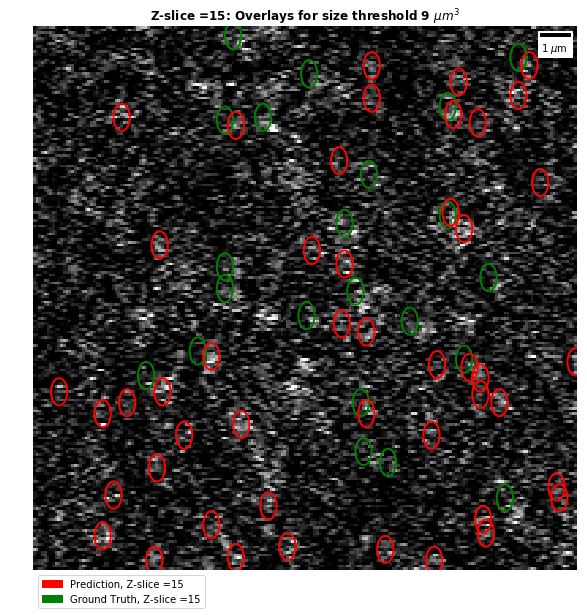

In [24]:
gt_15_ellipse = g_tru[g_tru['Z'] == 14]



pred_15_ellipse = pred[pred['Z'] == 14]


overlay_code(im2_final,gt_15_ellipse,pred_15_ellipse,15)

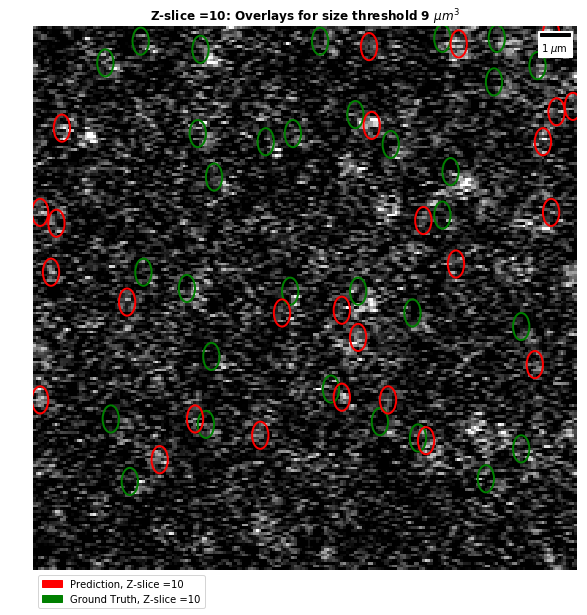

In [25]:
gt_10_ellipse = g_tru[g_tru['Z'] == 9]



pred_10_ellipse = pred[pred['Z'] == 9]


overlay_code(im3_final,gt_10_ellipse,pred_10_ellipse,10)